## Hypothesis
To predict the incentive level requested to program dishwasher after 11pm
    
IV: Age, Gender, OwnRent, SqftCate, HouseholdS, Political, Ethnic, Income, Educ
    Latitude, HomeS, EnergyC, MC, ComfNS, HabitC, Summer_avg, Winter_avg


In [89]:
options(digits=2);
# Read in the data
survey <- read.csv("DR_Survey2_Share_Complete.csv",header=T);
#populate missing values
#survey$IncHomeS[survey$IncHomeS==99] = NA;
#survey$IncHomeS[survey$IncHomeS==999] = NA;

#survey <- survey[survey$HomeS>60,];
#survey <- survey[survey$HomeS<80,];

#survey <- survey[survey$HomeW>60,];
#survey <- survey[survey$HomeW<80,];

data <- survey[,-c(1:7)];

#We investigate only use people who use A/C when being at home in summer
data1 <- data[data$HomeSYN==1,-which(names(data) %in% c("HomeWYN","AwayWNY","HomeSYN","AwaySNY","City","Utility",
    "ReasonPos","ReasonNeg","NBillS","NBillW","valid1","valid2","valid","Attitude","Trust","MCG","Frugal","ComfortS","ComfortW","SubN","PBC","ACYN","HeatYN",
    "Longitude", "Job","hot","cold"))];

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
      1       3       4       4       6       7     183 


  1   2   3   4   5   6   7 
 51  53  64 121  37 118  35 

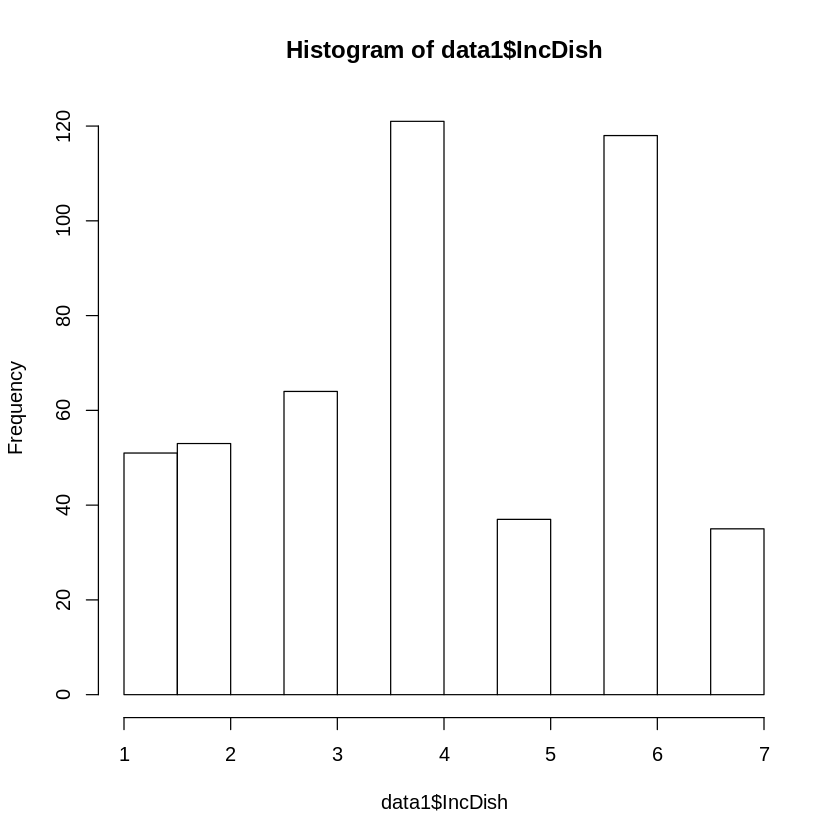

In [90]:
summary(data1$IncDish)
table(data1$IncDish)
hist(data1$IncDish)

In [91]:
#Fields with lots of missing values
for (n in names(data1)){
    nmis = sum(is.na(data1[,n]))
    if(nmis >1)  print (c(n, sum(is.na(data1[,n]))))
}

[1] "HomeW" "28"   
[1] "AwayW" "87"   
[1] "AwayS" "101"  
[1] "IncWD" "56"   
[1] "IncDish" "183"    
[1] "Age" "4"  
[1] "Income" "3"     
[1] "Educ" "5"   
[1] "Latitude" "21"      


In [92]:
#lets remover these
data2 <- data1[,-which(names(data1) %in% c("HomeW","AwayW",
                    "AwayS","IncWD"))];
print(dim(data2))
data2 <- na.omit(data2)
print(dim(data2))
#table(data2$Political)

[1] 662 101
[1] 454 101


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    1.0     3.0     4.0     4.1     6.0     7.0 


  1   2   3   4   5   6   7 
 48  50  60 119  34 111  32 

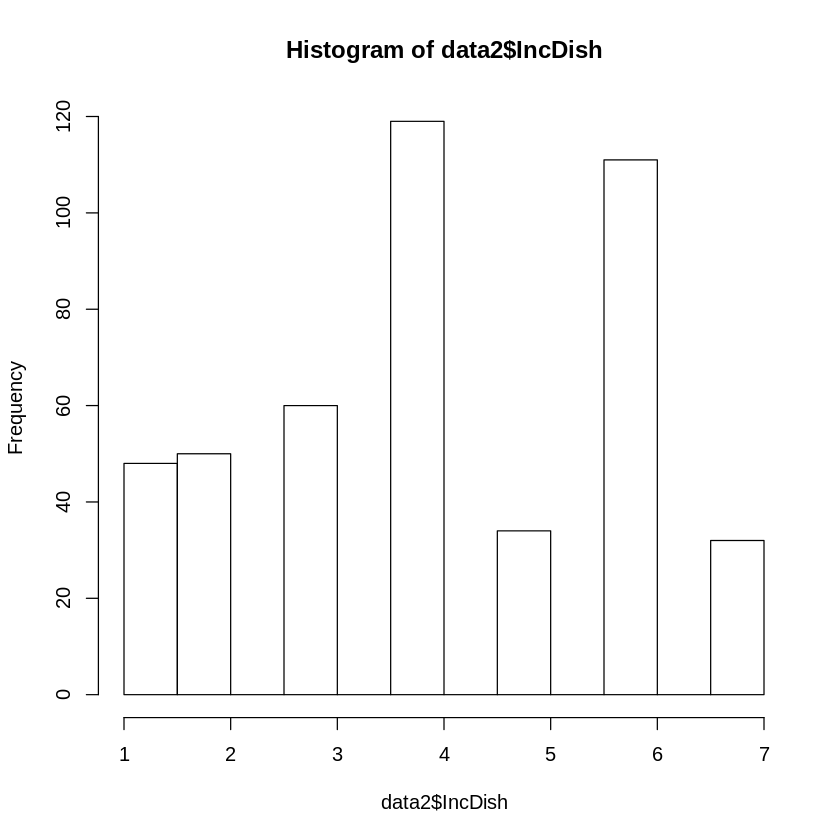

In [93]:
summary(data2$IncDish)
table(data2$IncDish)
hist(data2$IncDish)

In [94]:
sort(names(data2))

[1] "Age"        "Atti"       "Atti1"      "Atti2"      "Atti3"     
  [6] "Atti4"      "BillS"      "BillW"      "CashYN"     "ComfNS"    
 [11] "ComfNS1"    "ComfNS2"    "ComfNS3"    "ComfNW"     "ComfNW1"   
 [16] "ComfNW2"    "ControlN1"  "ControlN2R" "ControlN3"  "ControlN4" 
 [21] "ConvB1"     "ConvB2"     "ConvB3"     "ConvB4"     "Educ"      
 [26] "EmerRForm"  "EnergyC"    "EnergyC1"   "EnergyC2"   "EnergyC3"  
 [31] "EnergyC4"   "Ethnic"     "Frugal1"    "Frugal2"    "Frugal3"   
 [36] "Gender"     "HabitC"     "HabitC1"    "HabitC2"    "HabitC3"   
 [41] "HabitC4"    "HabitC5"    "HabitC6"    "HabitC7"    "HabitE1"   
 [46] "HabitE2"    "HabitE3"    "HabitG"     "HomeS"      "HouseholdS"
 [51] "INT1"       "INT2"       "INT3"       "INT4"       "IncAutoS"  
 [56] "IncAutoW"   "IncAwayS"   "IncAwayW"   "IncDish"    "IncEmer10S"
 [61] "IncEmer10W" "IncEmer30S" "IncEmer30W" "IncHomeS"   "IncHomeW"  
 [66] "Income"     "Latitude"   "MC"         "MC1"        "MC2"       
 [71] "MC3"        "MC4"        "MC5"        "MCBill"     "OwnRent"   
 [76] "PBC1"       "PBC2"       "PBC3R"      "PBC4"       "PBC5"      
 [81] "Political"  "RewardForm" "SN"         "SN1"        "SN2"       
 [86] "SN3"        "SN4"        "Sqft"       "SqftCate"   "State"     
 [91] "SubNorm"    "SubNorm1"   "SubNorm2"   "SubNorm3"   "Summer_avg"
 [96] "Trust1"     "Trust2"     "Trust3"     "Trust4"     "Winter_avg"
[101] "X.9to5"

In [95]:
#names(data2)
#These are only variables we really care about
IVS = c("Age",
"Gender",
"OwnRent",
"SqftCate",
"HouseholdS",
"Political",
"Ethnic",
"Income",
"Educ",
"Frugal",
"MC",
"EnergyC",
"Trust",
"ComfNS",
"Atti",
"SubNorm",
"PBC",
"SN",
"HabitG",
"HabitC",
"Latitude",
"Summer_avg",
"Winter_avg")

In [96]:
sort(names(data2))
paste(sort(IVS))

[1] "Age"        "Atti"       "Atti1"      "Atti2"      "Atti3"     
  [6] "Atti4"      "BillS"      "BillW"      "CashYN"     "ComfNS"    
 [11] "ComfNS1"    "ComfNS2"    "ComfNS3"    "ComfNW"     "ComfNW1"   
 [16] "ComfNW2"    "ControlN1"  "ControlN2R" "ControlN3"  "ControlN4" 
 [21] "ConvB1"     "ConvB2"     "ConvB3"     "ConvB4"     "Educ"      
 [26] "EmerRForm"  "EnergyC"    "EnergyC1"   "EnergyC2"   "EnergyC3"  
 [31] "EnergyC4"   "Ethnic"     "Frugal1"    "Frugal2"    "Frugal3"   
 [36] "Gender"     "HabitC"     "HabitC1"    "HabitC2"    "HabitC3"   
 [41] "HabitC4"    "HabitC5"    "HabitC6"    "HabitC7"    "HabitE1"   
 [46] "HabitE2"    "HabitE3"    "HabitG"     "HomeS"      "HouseholdS"
 [51] "INT1"       "INT2"       "INT3"       "INT4"       "IncAutoS"  
 [56] "IncAutoW"   "IncAwayS"   "IncAwayW"   "IncDish"    "IncEmer10S"
 [61] "IncEmer10W" "IncEmer30S" "IncEmer30W" "IncHomeS"   "IncHomeW"  
 [66] "Income"     "Latitude"   "MC"         "MC1"        "MC2"       
 [71] "MC3"        "MC4"        "MC5"        "MCBill"     "OwnRent"   
 [76] "PBC1"       "PBC2"       "PBC3R"      "PBC4"       "PBC5"      
 [81] "Political"  "RewardForm" "SN"         "SN1"        "SN2"       
 [86] "SN3"        "SN4"        "Sqft"       "SqftCate"   "State"     
 [91] "SubNorm"    "SubNorm1"   "SubNorm2"   "SubNorm3"   "Summer_avg"
 [96] "Trust1"     "Trust2"     "Trust3"     "Trust4"     "Winter_avg"
[101] "X.9to5"

[1] "Age"        "Atti"       "ComfNS"     "Educ"       "EnergyC"   
 [6] "Ethnic"     "Frugal"     "Gender"     "HabitC"     "HabitG"    
[11] "HouseholdS" "Income"     "Latitude"   "MC"         "OwnRent"   
[16] "PBC"        "Political"  "SN"         "SqftCate"   "SubNorm"   
[21] "Summer_avg" "Trust"      "Winter_avg"

In [97]:
data1 <- data2[, which(names(data2) %in% c("IncDish",IVS))];
sort(names(data1))

[1] "Age"        "Atti"       "ComfNS"     "Educ"       "EnergyC"   
 [6] "Ethnic"     "Gender"     "HabitC"     "HabitG"     "HouseholdS"
[11] "IncDish"    "Income"     "Latitude"   "MC"         "OwnRent"   
[16] "Political"  "SN"         "SqftCate"   "SubNorm"    "Summer_avg"
[21] "Winter_avg"

In [98]:
#Check to see if there are anymore missing values
for (n in names(data1)){
    nmis = sum(is.na(data1[,n]))
    if(nmis >1)  print (c(n, sum(is.na(data1[,n]))))
}

In [99]:
#names(data1)

#Fields with lots of missing values
for (n in names(data1)){
    nmis = sum(is.na(data1[,n]))
    if(nmis >1)  print (c(n, sum(is.na(data1[,n]))))
}
    
    
# What about high correlations?
hiCor <- function(x, level){
  res <- cor(x,method="spearman");
  res1 <- res; res1[res<0] <- -res[res < 0];
  for (i in 1:dim(x)[2]){
    res1[i,i] <- 0;
  }
  sel <- apply(res1,1,max,na.rm=T) > level;
  res[sel,sel];
}
#hiCor(data1,.75)

In [100]:
data2 <- data1;
data2 <- na.omit(data2)
names(data2)

[1] "IncDish"    "Age"        "Gender"     "OwnRent"    "SqftCate"  
 [6] "HouseholdS" "Political"  "Ethnic"     "Income"     "Educ"      
[11] "Latitude"   "EnergyC"    "MC"         "ComfNS"     "Atti"      
[16] "SubNorm"    "SN"         "HabitG"     "HabitC"     "Summer_avg"
[21] "Winter_avg"

In [101]:
#Check to see if there are anymore missing values
for (n in names(data2)){
    nmis = sum(is.na(data2[,n]))
    if(nmis >1)  print (c(n, sum(is.na(data2[,n]))))
}

In [102]:
hiCor(data2,.7)

,Latitude,Summer_avg,Winter_avg
Latitude,1.00,-0.76,0.83
Summer_avg,-0.76,1.00,-0.77
Winter_avg,0.83,-0.77,1.00


In [103]:
res<-prcomp(data2, retx=F,scale=T)$rotation[,1:20];
resAbs <- res;
resAbs[res<0] <- -res[res<0];
z <- cumsum(prcomp(data2, retx=F,scale=T)$sdev^2)/
     sum(prcomp(data2, retx=F,scale=T)$sdev^2)

for (i in 1:20){
  print(z[i]);
  print(t(res[resAbs[,i]>.2,i,drop=FALSE]));
}


[1] 0.14
    Latitude EnergyC    MC  Atti SubNorm HabitG HabitC Summer_avg Winter_avg
PC1     0.28   -0.35 -0.35 -0.38    -0.3  -0.29  -0.24      -0.28       0.29
[1] 0.26
    Latitude EnergyC ComfNS Atti Summer_avg Winter_avg
PC2     0.46    0.24   -0.2 0.25      -0.48       0.47
[1] 0.36
     Age OwnRent SqftCate HouseholdS Income
PC3 0.34    0.47     0.52        0.3   0.38
[1] 0.43
    IncDish Gender HouseholdS Income Educ ComfNS HabitC
PC4   -0.28  -0.47      -0.34   0.29 0.48  -0.27   0.34
[1] 0.49
    IncDish Political  Educ EnergyC  MC Atti HabitG HabitC
PC5    0.26     -0.48 -0.23   -0.28 0.2 -0.2   0.45   0.32
[1] 0.55
    IncDish   Age HouseholdS Political  Educ ComfNS
PC6   -0.44 -0.51       0.51     -0.27 -0.25  -0.25
[1] 0.6
    IncDish   Age Ethnic   SN
PC7    0.39 -0.28  -0.58 0.48
[1] 0.65
    OwnRent Ethnic Educ ComfNS SubNorm   SN HabitG
PC8   -0.23   0.43 0.23   0.46    0.42 0.41  -0.21
[1] 0.69
    SqftCate Political Ethnic Educ   MC    SN HabitC
PC9     -0.2      -

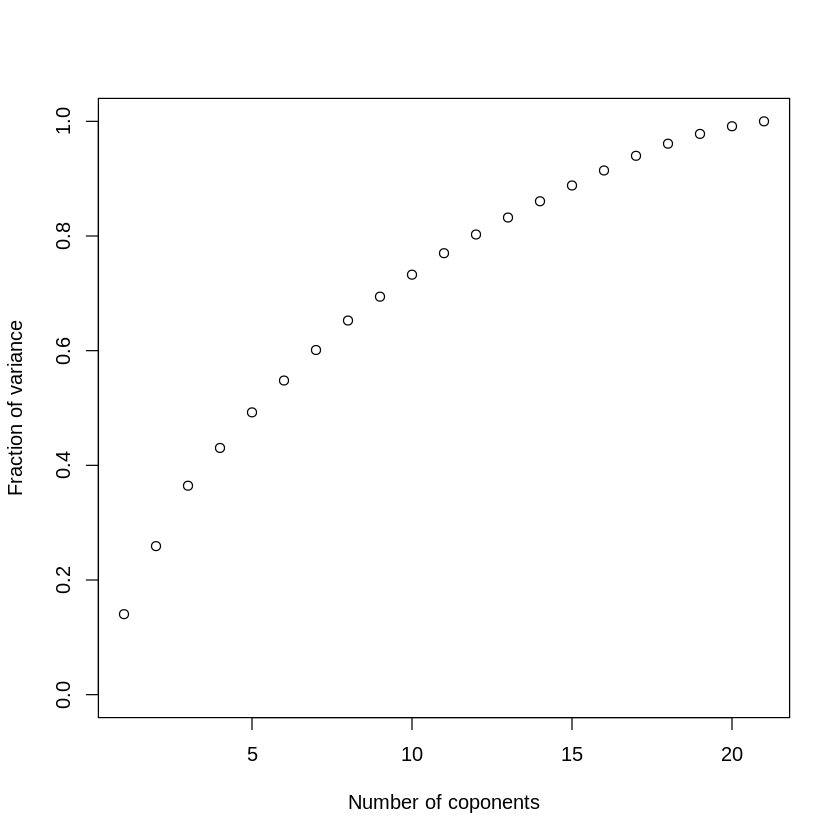

In [104]:
plot(1:dim(data2)[2],cumsum(prcomp(data2, retx=F,scale=T)$sdev^2)/
     sum(prcomp(data2, retx=F,scale=T)$sdev^2),
     ylim=c(0,1),xlab="Number of coponents",
     ylab="Fraction of variance");

In [105]:
res <- c();
vnam <- names(data2);
for (i in 2:dim(data2)[2]){
  fmla <- as.formula(paste(vnam[i],paste(vnam[-c(1,i)],collapse="+"),sep="~"));
  res <- rbind(res,c(i,round(summary(lm(fmla,data=data2))$r.squared,2)));
}

In [106]:
row.names(res) <- vnam[res[,1]];
o = order(-res[,2]);
res[o,][res[o,2]<.7,]

Latitude,11,0.60
Atti,15,0.47
EnergyC,12,0.43
SqftCate,5,0.38
OwnRent,4,0.30
MC,13,0.28
SubNorm,16,0.28
Income,9,0.25
HouseholdS,6,0.24
HabitG,18,0.23
Age,2,0.22


In [107]:
IndepPred <- row.names(res[o,][res[o,2]<.7,])

In [108]:
#IndepPred = c('Atti', 'EnergyC', 'SqftCate', 'OwnRent', 'MC', 'HouseholdS', 'Income', 'SubNorm', 'HabitC', 'Educ', 'PBC', 'Political', 'Gender', 'ComfNS', 'Latitude', 'Ethnic')
IndepPred = c('Age', 'Gender', 'OwnRent', 'SqftCate', 'HouseholdS', 'Political', 'Ethnic', 'Income', 'Educ', 'Latitude', 'EnergyC', 'MC', 'ComfNS', 'HabitC', 'HabitG', 'Summer_avg', 'Winter_avg')

In [109]:
fmla <- as.formula(paste("IncDish",paste(IndepPred,collapse="+"),sep="~"));

In [110]:
table(data2[,"IncDish"])


  1   2   3   4   5   6   7 
 48  50  60 119  34 111  32 

In [111]:
mod = lm(fmla,data=data2)
summary(mod)


Call:
lm(formula = fmla, data = data2)

Residuals:
   Min     1Q Median     3Q    Max 
-3.965 -1.237  0.016  1.463  3.806 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)  3.69992    1.47577    2.51   0.0125 * 
Age          0.02392    0.00841    2.84   0.0047 **
Gender       0.13950    0.17685    0.79   0.4306   
OwnRent     -0.01858    0.19139   -0.10   0.9227   
SqftCate     0.04834    0.09614    0.50   0.6153   
HouseholdS   0.12358    0.07689    1.61   0.1087   
Political    0.05412    0.10523    0.51   0.6073   
Ethnic      -0.43992    0.24811   -1.77   0.0769 . 
Income      -0.08549    0.05095   -1.68   0.0940 . 
Educ        -0.00543    0.08091   -0.07   0.9466   
Latitude    -0.00626    0.02590   -0.24   0.8093   
EnergyC     -0.17381    0.06418   -2.71   0.0070 **
MC           0.09124    0.08905    1.02   0.3061   
ComfNS       0.10475    0.06070    1.73   0.0851 . 
HabitC      -0.02816    0.06571   -0.43   0.6685   
HabitG       0.04279    0.080

In [112]:
mod = lm(fmla,data=data2,subs=data2$Latitude<37)
summary(mod)


Call:
lm(formula = fmla, data = data2, subset = data2$Latitude < 37)

Residuals:
   Min     1Q Median     3Q    Max 
-3.780 -1.188  0.026  1.219  3.807 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   1.6402     3.4908    0.47  0.63907    
Age           0.0449     0.0133    3.38  0.00091 ***
Gender        0.4085     0.2778    1.47  0.14325    
OwnRent      -0.1466     0.2888   -0.51  0.61248    
SqftCate     -0.0634     0.1523   -0.42  0.67777    
HouseholdS    0.2059     0.1131    1.82  0.07048 .  
Political     0.1907     0.1664    1.15  0.25355    
Ethnic       -0.9944     0.3452   -2.88  0.00449 ** 
Income       -0.0799     0.0750   -1.07  0.28823    
Educ          0.0302     0.1271    0.24  0.81276    
Latitude     -0.0141     0.0440   -0.32  0.74810    
EnergyC      -0.1033     0.0985   -1.05  0.29603    
MC           -0.0396     0.1498   -0.26  0.79184    
ComfNS        0.1816     0.0935    1.94  0.05370 .  
HabitC       -0.0176     0.1069   -0

In [113]:
mod = lm(fmla,data=data2,subs=data2$Latitude>37)
summary(mod)


Call:
lm(formula = fmla, data = data2, subset = data2$Latitude > 37)

Residuals:
   Min     1Q Median     3Q    Max 
-3.874 -1.159  0.032  1.425  3.454 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)   
(Intercept)  5.958019   2.550326    2.34   0.0203 * 
Age          0.007681   0.010984    0.70   0.4850   
Gender       0.081787   0.236223    0.35   0.7295   
OwnRent      0.102460   0.267765    0.38   0.7023   
SqftCate     0.123855   0.126662    0.98   0.3291   
HouseholdS   0.042940   0.107536    0.40   0.6900   
Political   -0.067387   0.139935   -0.48   0.6305   
Ethnic       0.199243   0.364745    0.55   0.5854   
Income      -0.093389   0.069909   -1.34   0.1828   
Educ        -0.000946   0.107362   -0.01   0.9930   
Latitude    -0.042987   0.050194   -0.86   0.3926   
EnergyC     -0.239672   0.085853   -2.79   0.0057 **
MC           0.126854   0.111479    1.14   0.2562   
ComfNS       0.040329   0.082888    0.49   0.6270   
HabitC      -0.040810   0.085850   -

In [114]:
#17 states with highest average temp
mod = lm(fmla,data=data2,subs=data2$Summer_avg==3)
summary(mod)


Call:
lm(formula = fmla, data = data2, subset = data2$Summer_avg == 
    3)

Residuals:
   Min     1Q Median     3Q    Max 
-4.222 -1.245  0.157  1.346  3.422 

Coefficients: (1 not defined because of singularities)
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)   4.0670     1.5842    2.57   0.0109 * 
Age           0.0371     0.0121    3.08   0.0023 **
Gender        0.0741     0.2439    0.30   0.7615   
OwnRent      -0.1635     0.2622   -0.62   0.5336   
SqftCate      0.0504     0.1358    0.37   0.7108   
HouseholdS    0.0792     0.1009    0.79   0.4331   
Political    -0.0404     0.1455   -0.28   0.7814   
Ethnic       -0.7362     0.3024   -2.43   0.0157 * 
Income       -0.0785     0.0680   -1.15   0.2494   
Educ         -0.0478     0.1110   -0.43   0.6672   
Latitude     -0.0454     0.0346   -1.31   0.1902   
EnergyC      -0.1393     0.0817   -1.70   0.0897 . 
MC            0.1835     0.1247    1.47   0.1426   
ComfNS        0.1154     0.0875    1.32   0.1887   
Hab

In [115]:
#17 middle states according to average summer temp
mod = lm(fmla,data=data2,subs=data2$Summer_avg==2)
summary(mod)


Call:
lm(formula = fmla, data = data2, subset = data2$Summer_avg == 
    2)

Residuals:
   Min     1Q Median     3Q    Max 
-3.975 -0.983 -0.080  1.226  3.779 

Coefficients: (1 not defined because of singularities)
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)  0.40079    6.16252    0.07    0.948  
Age          0.00712    0.01990    0.36    0.721  
Gender       0.36683    0.42934    0.85    0.396  
OwnRent      0.27582    0.45843    0.60    0.549  
SqftCate     0.03855    0.22915    0.17    0.867  
HouseholdS   0.17829    0.19138    0.93    0.354  
Political    0.28932    0.27415    1.06    0.295  
Ethnic       0.17643    0.76958    0.23    0.819  
Income      -0.06922    0.12579   -0.55    0.584  
Educ         0.07236    0.21702    0.33    0.740  
Latitude     0.12012    0.16013    0.75    0.456  
EnergyC     -0.33146    0.20147   -1.65    0.104  
MC          -0.09048    0.20440   -0.44    0.659  
ComfNS       0.01258    0.14930    0.08    0.933  
HabitC      -0.289

In [116]:
#bottom 17 states according to average summer temp
mod = lm(fmla,data=data2,subs=data2$Summer_avg==1)
summary(mod)


Call:
lm(formula = fmla, data = data2, subset = data2$Summer_avg == 
    1)

Residuals:
   Min     1Q Median     3Q    Max 
-3.350 -1.131 -0.052  1.435  3.706 

Coefficients: (1 not defined because of singularities)
            Estimate Std. Error t value Pr(>|t|)
(Intercept)  2.12138    3.70268    0.57     0.57
Age          0.01459    0.01765    0.83     0.41
Gender       0.03189    0.39842    0.08     0.94
OwnRent      0.04600    0.43387    0.11     0.92
SqftCate     0.02741    0.20399    0.13     0.89
HouseholdS   0.18359    0.18666    0.98     0.33
Political    0.09373    0.23394    0.40     0.69
Ethnic       0.30127    0.67450    0.45     0.66
Income      -0.09560    0.12170   -0.79     0.43
Educ         0.03263    0.17128    0.19     0.85
Latitude     0.00175    0.06156    0.03     0.98
EnergyC     -0.19286    0.14429   -1.34     0.18
MC           0.12320    0.19221    0.64     0.52
ComfNS       0.14480    0.12701    1.14     0.26
HabitC       0.08091    0.14368    0.56     0.57

In [117]:
#top 17 states according to average winter temp
mod = lm(fmla,data=data2,subs=data2$Winter_avg==3)
summary(mod)


Call:
lm(formula = fmla, data = data2, subset = data2$Winter_avg == 
    3)

Residuals:
   Min     1Q Median     3Q    Max 
-2.850 -1.074 -0.181  1.025  4.099 

Coefficients: (1 not defined because of singularities)
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)  2.62278    3.77439    0.69    0.489  
Age          0.02773    0.01796    1.54    0.127  
Gender       0.18474    0.41639    0.44    0.659  
OwnRent     -0.31055    0.45817   -0.68    0.500  
SqftCate     0.15642    0.23492    0.67    0.508  
HouseholdS  -0.04339    0.19959   -0.22    0.829  
Political    0.00147    0.25212    0.01    0.995  
Ethnic       0.26674    0.71161    0.37    0.709  
Income      -0.24430    0.13318   -1.83    0.071 .
Educ        -0.01030    0.19273   -0.05    0.958  
Latitude    -0.00925    0.06654   -0.14    0.890  
EnergyC     -0.20774    0.15368   -1.35    0.181  
MC           0.31672    0.20569    1.54    0.128  
ComfNS       0.12859    0.13602    0.95    0.348  
HabitC       0.247

In [118]:
#middle 17 states according to average winter temp
mod = lm(fmla,data=data2,subs=data2$Winter_avg==2)
summary(mod)


Call:
lm(formula = fmla, data = data2, subset = data2$Winter_avg == 
    2)

Residuals:
   Min     1Q Median     3Q    Max 
-4.067 -1.256  0.084  1.442  3.461 

Coefficients: (1 not defined because of singularities)
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)  7.76222    3.29605    2.36    0.020 *
Age         -0.01034    0.01665   -0.62    0.536  
Gender       0.20021    0.34380    0.58    0.561  
OwnRent      0.41298    0.38703    1.07    0.288  
SqftCate     0.11778    0.17718    0.66    0.507  
HouseholdS   0.12886    0.15198    0.85    0.398  
Political   -0.11950    0.19673   -0.61    0.545  
Ethnic       0.24032    0.50275    0.48    0.633  
Income      -0.13201    0.09499   -1.39    0.167  
Educ        -0.03861    0.15315   -0.25    0.801  
Latitude    -0.05922    0.05619   -1.05    0.294  
EnergyC     -0.22450    0.11695   -1.92    0.057 .
MC          -0.01781    0.15495   -0.11    0.909  
ComfNS       0.00865    0.12527    0.07    0.945  
HabitC      -0.115

In [119]:
#bottom 17 states according to average winter temp
mod = lm(fmla,data=data2,subs=data2$Winter_avg==1)
summary(mod)


Call:
lm(formula = fmla, data = data2, subset = data2$Winter_avg == 
    1)

Residuals:
   Min     1Q Median     3Q    Max 
-3.853 -1.179  0.046  1.309  3.758 

Coefficients: (1 not defined because of singularities)
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.72930    2.41072    1.96  0.05116 .  
Age          0.04405    0.01205    3.66  0.00033 ***
Gender       0.13632    0.25341    0.54  0.59121    
OwnRent     -0.18240    0.27334   -0.67  0.50534    
SqftCate    -0.04799    0.13831   -0.35  0.72899    
HouseholdS   0.11865    0.10500    1.13  0.25981    
Political    0.17789    0.15142    1.17  0.24145    
Ethnic      -0.96896    0.33280   -2.91  0.00400 ** 
Income      -0.02672    0.07136   -0.37  0.70845    
Educ        -0.00612    0.11757   -0.05  0.95857    
Latitude    -0.02469    0.03980   -0.62  0.53578    
EnergyC     -0.12697    0.09301   -1.37  0.17373    
MC           0.08424    0.13573    0.62  0.53554    
ComfNS       0.19545    0.08643    2.26  

In [120]:
anova(mod)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Age,1,43.834,43.834,14.7835,0.00016
Gender,1,1.161,1.161,0.3916,0.53216
OwnRent,1,4.345,4.345,1.4653,0.22749
SqftCate,1,0.021,0.021,0.0072,0.93234
HouseholdS,1,6.070,6.070,2.0471,0.15403
Political,1,4.292,4.292,1.4476,0.23032
Ethnic,1,19.395,19.395,6.5413,0.01127
Income,1,1.088,1.088,0.3668,0.54540
Educ,1,0.467,0.467,0.1574,0.69196
Latitude,1,0.123,0.123,0.0415,0.83870


In [121]:
fit <- factanal(data2, 2, rotation="varimax")
print(fit, digits=2, cutoff=.3, sort=TRUE)


Call:
factanal(x = data2, factors = 2, rotation = "varimax")

Uniquenesses:
   IncDish        Age     Gender    OwnRent   SqftCate HouseholdS  Political 
      0.99       0.98       0.90       0.99       1.00       0.99       0.94 
    Ethnic     Income       Educ   Latitude    EnergyC         MC     ComfNS 
      0.98       0.98       0.98       0.36       0.49       0.74       0.94 
      Atti    SubNorm         SN     HabitG     HabitC Summer_avg Winter_avg 
      0.37       0.78       0.95       0.86       0.92       0.23       0.18 

Loadings:
           Factor1 Factor2
Latitude    0.80          
Summer_avg -0.88          
Winter_avg  0.90          
EnergyC             0.71  
Atti                0.79  
IncDish                   
Age                       
Gender              0.30  
OwnRent                   
SqftCate                  
HouseholdS                
Political                 
Ethnic                    
Income                    
Educ                      
MC          

In [168]:
mod = lm(IncHomeS~ComfNS+EnergyC+Age+Ethnic+MC+Political+Educ,data=data2)
summary(mod)
#plot(mod)


Call:
lm(formula = IncHomeS ~ ComfNS + EnergyC + Age + Ethnic + MC + 
    Political + Educ, data = data2)

Residuals:
   Min     1Q Median     3Q    Max 
-4.422 -1.111 -0.151  0.985  4.816 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.38581    0.59224    4.03  6.3e-05 ***
ComfNS       0.37014    0.04774    7.75  3.7e-14 ***
EnergyC     -0.09642    0.05315   -1.81  0.07016 .  
Age          0.02134    0.00617    3.46  0.00058 ***
Ethnic      -0.42435    0.18204   -2.33  0.02007 *  
MC          -0.05075    0.06598   -0.77  0.44208    
Political    0.09324    0.08700    1.07  0.28426    
Educ         0.00636    0.06230    0.10  0.91875    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.7 on 619 degrees of freedom
Multiple R-squared:  0.126,	Adjusted R-squared:  0.116 
F-statistic: 12.7 on 7 and 619 DF,  p-value: 2.73e-15


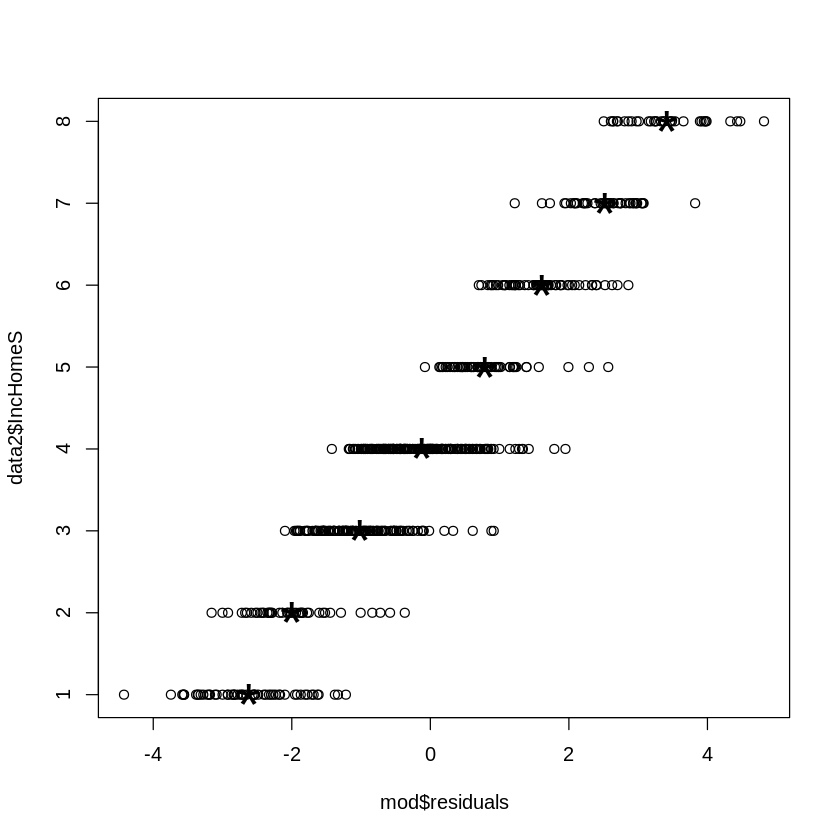

In [169]:
plot(mod$residuals,data2$IncHomeS)
z<-tapply(mod$residuals,data2$IncHomeS,mean)
points(z,1:8,pch="*",cex=3)

In [170]:
mod = lm(IncHomeS~ComfNS+Age,data=data2)
summary(mod)


Call:
lm(formula = IncHomeS ~ ComfNS + Age, data = data2)

Residuals:
   Min     1Q Median     3Q    Max 
 -3.76  -1.08  -0.18   1.02   4.69 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.53248    0.31962    4.79  2.0e-06 ***
ComfNS       0.37397    0.04712    7.94  9.7e-15 ***
Age          0.01922    0.00612    3.14   0.0018 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.7 on 624 degrees of freedom
Multiple R-squared:  0.11,	Adjusted R-squared:  0.107 
F-statistic: 38.6 on 2 and 624 DF,  p-value: <2e-16


In [41]:
#Probably overfitting
mod1 = lm(IncHomeS~ComfNS3+Age+HabitC2,data=data2)
summary(mod1)

ERROR: Error in eval(expr, envir, enclos): object 'ComfNS3' not found


In [19]:
library(mgcv)


Loading required package: nlme
This is mgcv 1.8-14. For overview type 'help("mgcv-package")'.


In [20]:
mGam = gam(IncHomeS~I(ComfNS3<=3)+I(ComfNS3==7)+s(Age),data=data2)
summary(mGam)



Family: gaussian 
Link function: identity 

Formula:
IncHomeS ~ I(ComfNS3 <= 3) + I(ComfNS3 == 7) + s(Age)

Parametric coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)           4.1826     0.0906   46.17  < 2e-16 ***
I(ComfNS3 <= 3)TRUE  -0.7694     0.1666   -4.62  4.7e-06 ***
I(ComfNS3 == 7)TRUE   0.7656     0.1738    4.40  1.2e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Approximate significance of smooth terms:
       edf Ref.df    F p-value    
s(Age)   1      1 13.3 0.00029 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

R-sq.(adj) =  0.0975   Deviance explained = 10.2%
GCV = 2.9649  Scale est. = 2.9465    n = 644

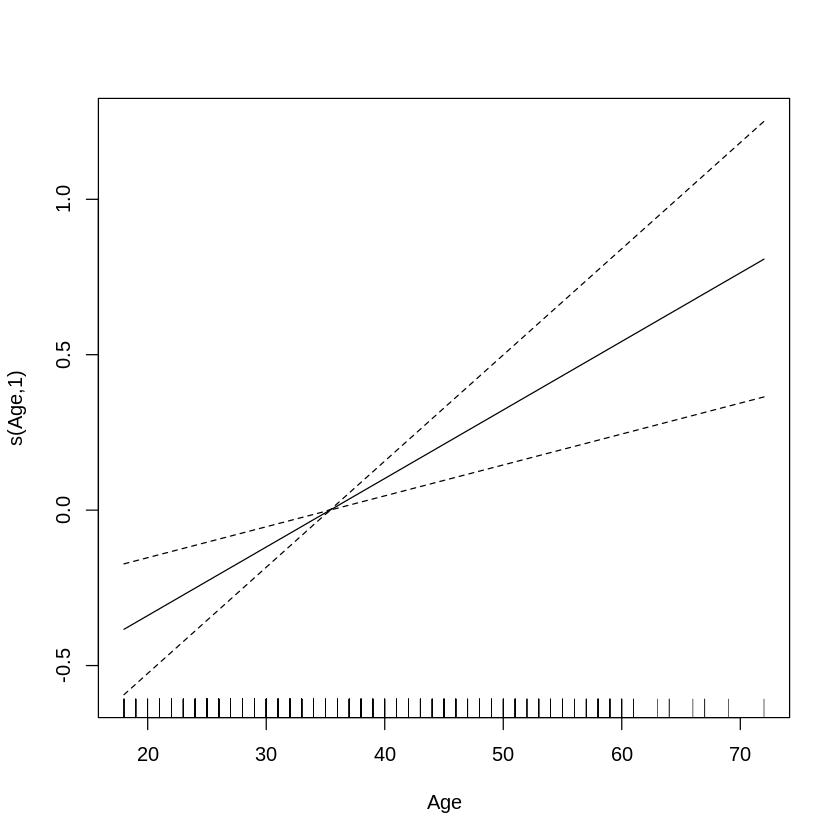

In [21]:
plot(mGam)

In [22]:
mod1 = lm(IncHomeS~I(ComfNS3<=3)+I(ComfNS3==7)+Age+HabitC2+ Political,data=data2)
summary(mod1)



Call:
lm(formula = IncHomeS ~ I(ComfNS3 <= 3) + I(ComfNS3 == 7) + Age + 
    HabitC2 + Political, data = data2)

Residuals:
   Min     1Q Median     3Q    Max 
-4.234 -1.162 -0.081  1.001  4.540 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)          4.19372    0.34065   12.31  < 2e-16 ***
I(ComfNS3 <= 3)TRUE -0.77483    0.16608   -4.67  3.8e-06 ***
I(ComfNS3 == 7)TRUE  0.75141    0.17314    4.34  1.7e-05 ***
Age                  0.02211    0.00602    3.67  0.00026 ***
HabitC2             -0.09516    0.03689   -2.58  0.01011 *  
Political           -0.05864    0.03039   -1.93  0.05408 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.7 on 638 degrees of freedom
Multiple R-squared:  0.116,	Adjusted R-squared:  0.109 
F-statistic: 16.7 on 5 and 638 DF,  p-value: 1.68e-15


In [23]:
anova(mod1)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
I(ComfNS3 <= 3),1,115,115.2,39.6,5.8e-10
I(ComfNS3 == 7),1,59,59.2,20.3,7.7e-06
Age,1,39,39.1,13.4,2.7e-04
HabitC2,1,18,18.4,6.3,1.2e-02
Political,1,11,10.8,3.7,5.4e-02
Residuals,638,1857,2.9,NA,NA


In [24]:
drop1(mod1)

,Df,Sum of Sq,RSS,AIC
<none>,NA,NA,1857,694
I(ComfNS3 <= 3),1,63,1920,713
I(ComfNS3 == 7),1,55,1911,711
Age,1,39,1896,705
HabitC2,1,19,1876,699
Political,1,11,1867,696


In [25]:
library(bnlearn)


Attaching package: 'bnlearn'

The following object is masked from 'package:stats':

    sigma



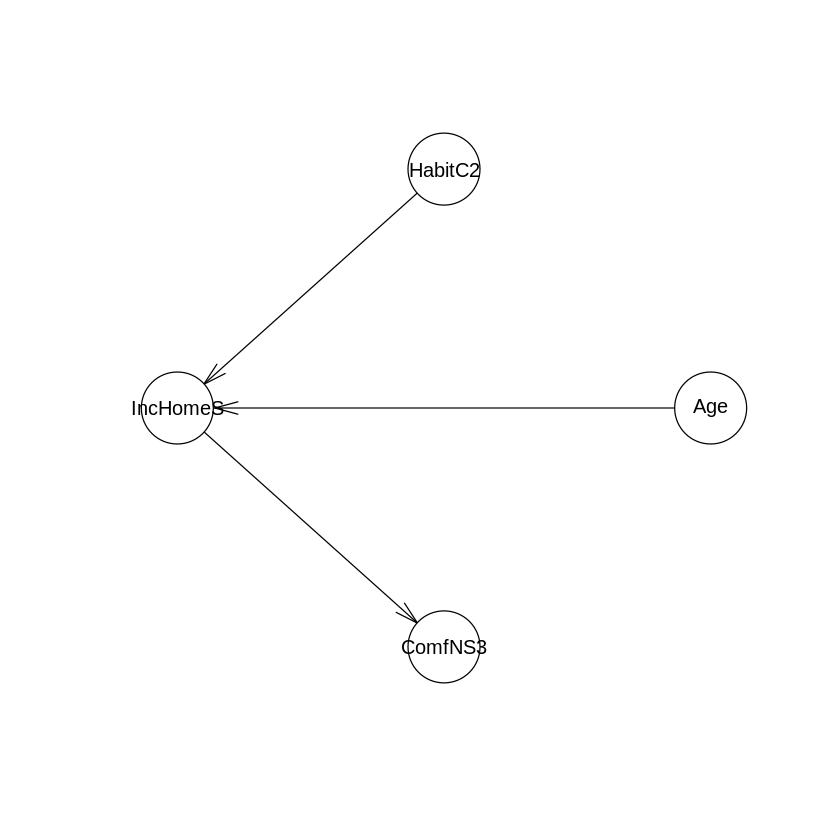

In [26]:
dd2 = data2[,c('IncHomeS', 'ComfNS3','Age','HabitC2')]
for (i in 1:4) dd2[,i] <- as.double(dd2[,i])
dag2 = tabu(dd2)
plot(dag2)

In [27]:
fmlaF <- as.formula(paste("IncHomeS",paste(IVS,collapse="+"),sep="~"));
mod = lm(fmlaF,data=data2)
summary(mod)


Call:
lm(formula = fmlaF, data = data2)

Residuals:
   Min     1Q Median     3Q    Max 
-3.672 -1.120 -0.092  1.051  4.878 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)   
(Intercept)  3.12e+00   1.26e+00    2.49   0.0132 * 
Age          2.37e-02   7.22e-03    3.28   0.0011 **
Gender       1.02e-01   1.56e-01    0.66   0.5117   
OwnRent     -1.93e-03   1.64e-01   -0.01   0.9906   
BillS        6.56e-04   1.27e-03    0.52   0.6060   
NBillS       1.30e-01   1.29e-01    1.01   0.3138   
Sqft        -3.13e-05   1.11e-04   -0.28   0.7776   
SqftCate    -3.01e-02   1.10e-01   -0.27   0.7853   
HouseholdS  -8.02e-02   6.84e-02   -1.17   0.2412   
Political   -6.80e-02   3.33e-02   -2.04   0.0417 * 
Ethnic       1.03e-01   6.05e-02    1.70   0.0901 . 
Income      -3.16e-02   4.24e-02   -0.74   0.4571   
Educ         2.87e-02   6.87e-02    0.42   0.6760   
MC1          2.52e-03   7.09e-02    0.04   0.9716   
MC2          3.68e-02   7.60e-02    0.48   0.6290   
MC3         

In [28]:
#Probably overfitting
mod1 = lm(IncHomeS~ComfNS3+Age+HabitC2+Political+Ethnic+Trust1,data=data2)
summary(mod1)


Call:
lm(formula = IncHomeS ~ ComfNS3 + Age + HabitC2 + Political + 
    Ethnic + Trust1, data = data2)

Residuals:
   Min     1Q Median     3Q    Max 
-4.518 -1.152 -0.131  1.015  4.526 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.53367    0.43662    5.80  1.0e-08 ***
ComfNS3      0.28415    0.03962    7.17  2.1e-12 ***
Age          0.02216    0.00608    3.65  0.00029 ***
HabitC2     -0.09861    0.03698   -2.67  0.00786 ** 
Political   -0.05255    0.03052   -1.72  0.08559 .  
Ethnic       0.09676    0.05622    1.72  0.08571 .  
Trust1       0.02235    0.04340    0.51  0.60675    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.7 on 637 degrees of freedom
Multiple R-squared:  0.114,	Adjusted R-squared:  0.106 
F-statistic: 13.7 on 6 and 637 DF,  p-value: 1.1e-14


In [29]:
for (i in 1:length(IVS){
  fmla <- as.formula(paste(IVS[i],paste(vnam[-c(1,i)],collapse="+"),sep="~"));
  res <- rbind(res,c(i,round(summary(lm(fmla,data=data2))$r.squared,2)));
}
vnam <- (data2);
fmlaF <- as.formula(paste("Age",paste(IVS[-"Age"],collapse="+"),sep="~"));
mod = lm(fmlaF,data=data2)
summary(mod)

ERROR: Error in parse(text = x, srcfile = src): <text>:1:24: unexpected '{'
1: for (i in 1:length(IVS){
                           ^


In [ ]:
ind <- 1:length(IVS);names(ind) <- IVS

In [ ]:
fmlaF <- as.formula(paste("Age",paste(IVS[-ind["Age"]],collapse="+"),sep="~"));
mod = lm(fmlaF,data=data2)
res <- summary(mod)$coefficients
res[abs(res[,3])>3,]

In [ ]:
fmlaF <- as.formula(paste("ComfNS3",paste(IVS[-ind["ComfNS3"]],collapse="+"),sep="~"));
mod = lm(fmlaF,data=data2)
res <- summary(mod)$coefficients
res[abs(res[,3])>3,]

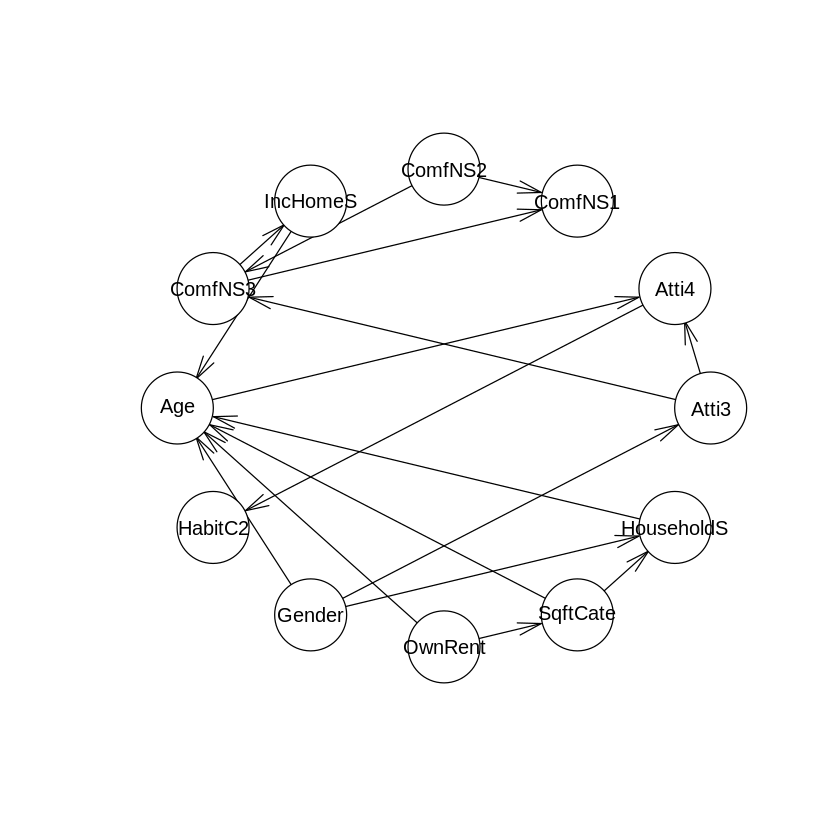

In [30]:
dd2 = data2[,c('IncHomeS', 'ComfNS3','Age','HabitC2',"Gender","OwnRent","SqftCate",
               "HouseholdS","Atti3","Atti4","ComfNS1","ComfNS2")]
for (i in 1:12) dd2[,i] <- as.double(dd2[,i])
dag2 = tabu(dd2)
plot(dag2)